In [1]:
import pandas as pd
import numpy as np
import platform
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

### 서울시 코로나 확진자 현황 데이터 불러오기

In [2]:
seoul_covid = pd.read_csv('./data/서울시 코로나19 확진자 현황.csv', sep=',', encoding='CP949')
seoul_covid.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,8966,11.30.,NaN,NaN,NaN,강북구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
1,8965,11.30.,NaN,NaN,NaN,타시도,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
2,8964,11.30.,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
3,8963,11.30.,NaN,NaN,NaN,영등포구,NaN,서초구 사우나 관련,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
4,8962,11.30.,NaN,NaN,NaN,영등포구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y


In [3]:
seoul_covid['확진자수'] = 1
seoul_covid.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부,확진자수
0,8966,11.30.,NaN,NaN,NaN,강북구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y,1
1,8965,11.30.,NaN,NaN,NaN,타시도,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y,1
2,8964,11.30.,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y,1
3,8963,11.30.,NaN,NaN,NaN,영등포구,NaN,서초구 사우나 관련,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y,1
4,8962,11.30.,NaN,NaN,NaN,영등포구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y,1


In [4]:
seoul_covid = seoul_covid[['연번', '확진일', '지역', '여행력', '접촉력', '상태', '확진자수']]
seoul_covid = seoul_covid.fillna(' ')
seoul_covid.head()

,연번,확진일,지역,여행력,접촉력,상태,확진자수
0,8966,11.30.,강북구,,감염경로 조사중,,1
1,8965,11.30.,타시도,,기타 확진자 접촉,,1
2,8964,11.30.,타시도,,감염경로 조사중,,1
3,8963,11.30.,영등포구,,서초구 사우나 관련,,1
4,8962,11.30.,영등포구,,감염경로 조사중,,1


In [5]:
seoul_covid = seoul_covid[seoul_covid['지역'] != '경기도']
seoul_covid = seoul_covid[seoul_covid['지역'] != '타시도']
seoul_covid = seoul_covid[seoul_covid['지역'] != '기타']
seoul_covid.head()

,연번,확진일,지역,여행력,접촉력,상태,확진자수
0,8966,11.30.,강북구,,감염경로 조사중,,1
3,8963,11.30.,영등포구,,서초구 사우나 관련,,1
4,8962,11.30.,영등포구,,감염경로 조사중,,1
5,8961,11.30.,노원구,,타시도 확진자 접촉,,1
6,8960,11.30.,강동구,,타시도 확진자 접촉,,1


In [6]:
seoul_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8299 entries, 0 to 8965
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      8299 non-null   int64 
 1   확진일     8299 non-null   object
 2   지역      8299 non-null   object
 3   여행력     8299 non-null   object
 4   접촉력     8299 non-null   object
 5   상태      8299 non-null   object
 6   확진자수    8299 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 518.7+ KB


In [7]:
date_list = []

for n in seoul_covid.index:
    date_list.append(f"2020-{seoul_covid['확진일'][n].split('.')[0]}-{seoul_covid['확진일'][n].split('.')[1]}")

seoul_covid['확진일'] = date_list
seoul_covid['확진월'] = date_list

In [8]:
seoul_covid.head()

,연번,확진일,지역,여행력,접촉력,상태,확진자수,확진월
0,8966,2020-11-30,강북구,,감염경로 조사중,,1,2020-11-30
3,8963,2020-11-30,영등포구,,서초구 사우나 관련,,1,2020-11-30
4,8962,2020-11-30,영등포구,,감염경로 조사중,,1,2020-11-30
5,8961,2020-11-30,노원구,,타시도 확진자 접촉,,1,2020-11-30
6,8960,2020-11-30,강동구,,타시도 확진자 접촉,,1,2020-11-30


In [9]:
seoul_covid["확진일"] = pd.to_datetime(seoul_covid["확진일"])
seoul_covid["확진월"] = pd.to_datetime(seoul_covid["확진월"])
seoul_covid["확진월"] = seoul_covid["확진월"].dt.strftime('%m')

In [10]:
seoul_covid.head()

,연번,확진일,지역,여행력,접촉력,상태,확진자수,확진월
0,8966,2020-11-30,강북구,,감염경로 조사중,,1,11
3,8963,2020-11-30,영등포구,,서초구 사우나 관련,,1,11
4,8962,2020-11-30,영등포구,,감염경로 조사중,,1,11
5,8961,2020-11-30,노원구,,타시도 확진자 접촉,,1,11
6,8960,2020-11-30,강동구,,타시도 확진자 접촉,,1,11


In [11]:
seoul_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8299 entries, 0 to 8965
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      8299 non-null   int64         
 1   확진일     8299 non-null   datetime64[ns]
 2   지역      8299 non-null   object        
 3   여행력     8299 non-null   object        
 4   접촉력     8299 non-null   object        
 5   상태      8299 non-null   object        
 6   확진자수    8299 non-null   int64         
 7   확진월     8299 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 903.5+ KB


### 시각화 - 그래프 (코로나 데이터로만)

#### 일별 확진자 추이
- 강사님 참조

In [12]:
covid_date = pd.pivot_table(seoul_covid, index=['확진일'], values=['확진자수'], aggfunc=sum)
covid_date.head()

,확진자수
확진일,
2020-01-24,1
2020-01-30,3
2020-01-31,3
2020-02-05,2
2020-02-06,1


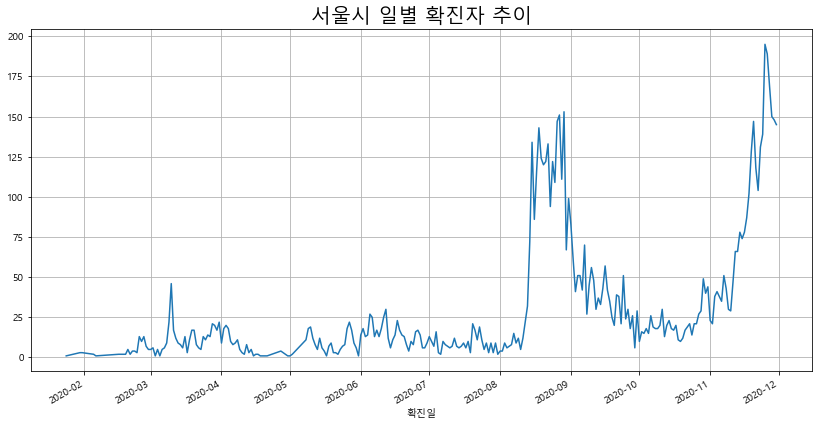

In [13]:
covid_date['확진자수'].plot(grid=True, figsize=(14,7))
plt.title('서울시 일별 확진자 추이', fontsize=20)
plt.show()

#### 각 구별 누적 환자의 상태 (치료중 / 사망 / 퇴원)

In [14]:
seoul_covid['상태'] = seoul_covid['상태'].replace(' ', '치료중')

In [15]:
covid_sang = pd.pivot_table(seoul_covid, index=['지역'], columns=['상태'], values=['확진자수'], aggfunc=sum)
covid_sang = covid_sang.fillna(0)
covid_sang.head()

확진자수              
상태    사망    치료중     퇴원
지역                    
강남구  4.0  126.0  390.0
강동구  1.0   56.0  220.0
강북구  0.0   35.0  165.0
강서구  6.0  244.0  354.0
관악구  6.0   57.0  484.0

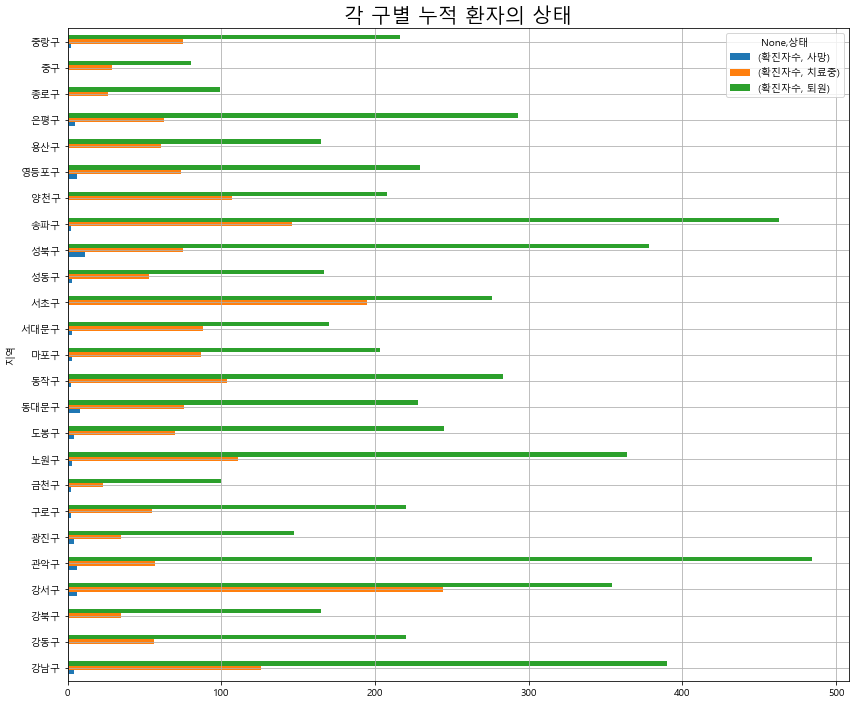

In [16]:
ax = covid_sang.plot(kind='barh', figsize=(14,12), legend=True)
plt.title("각 구별 누적 환자의 상태", fontsize=20)
plt.grid()
plt.show()

#### 각 구별 11월 확진자 상태

In [17]:
covid_11 = seoul_covid[seoul_covid['확진월'] == '11']
covid_11.head()

,연번,확진일,지역,여행력,접촉력,상태,확진자수,확진월
0,8966,2020-11-30,강북구,,감염경로 조사중,치료중,1,11
3,8963,2020-11-30,영등포구,,서초구 사우나 관련,치료중,1,11
4,8962,2020-11-30,영등포구,,감염경로 조사중,치료중,1,11
5,8961,2020-11-30,노원구,,타시도 확진자 접촉,치료중,1,11
6,8960,2020-11-30,강동구,,타시도 확진자 접촉,치료중,1,11


In [18]:
covid_11 = pd.pivot_table(covid_11, index=['지역'], values=['확진자수'], aggfunc=sum)
covid_11.head()

,확진자수
지역,
강남구,163
강동구,73
강북구,41
강서구,299
관악구,71


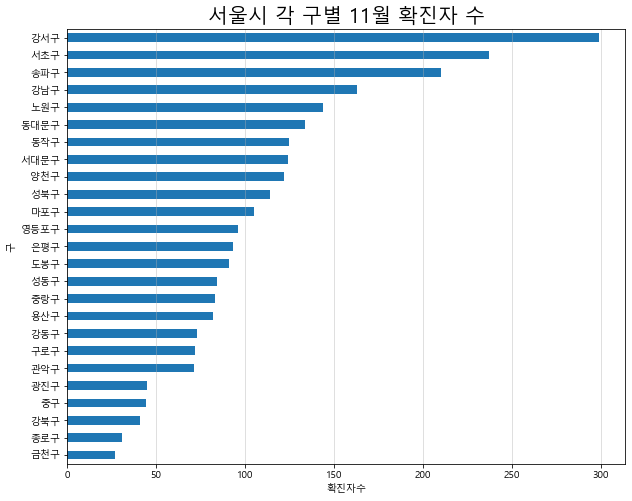

In [19]:
covid_11 = covid_11.sort_values(by=['확진자수'], axis=0)
covid_11.plot(kind='barh', rot=0, figsize=(10,8), legend=False)
plt.title("서울시 각 구별 11월 확진자 수", fontsize=20)
plt.xlabel("확진자수")
plt.ylabel("구")
plt.grid(True, axis='x', alpha=0.5)
plt.show()

#### 월별 확진자수

In [20]:
covid_month = pd.pivot_table(seoul_covid, index=['확진월'], values=['확진자수'], aggfunc=sum)
covid_month = covid_month.fillna(0)
covid_month.head()

,확진자수
확진월,
01,7
02,73
03,369
04,143
05,216


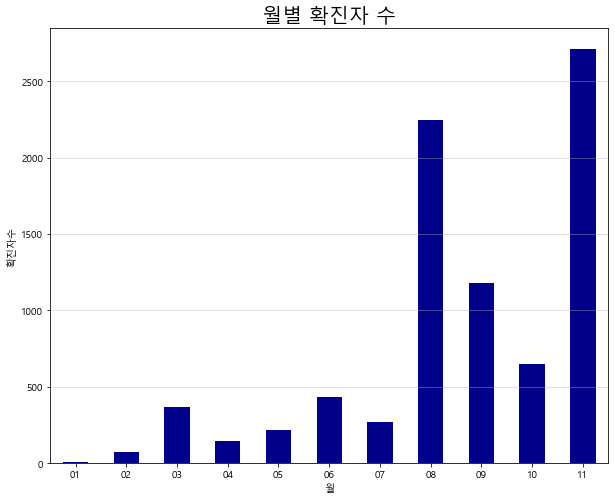

In [21]:
covid_month.plot(kind='bar', rot=0, legend=False, figsize=(10,8), color='darkblue')
plt.title("월별 확진자 수", fontsize=20)
plt.xlabel("월")
plt.grid(axis='y', alpha=0.5)
plt.ylabel("확진자수")
plt.show()

### 시각화 - 지도 (코로나 데이터로만)

#### 구별 누적 확진자

In [22]:
# 누적확진자
covid_gu = pd.pivot_table(covid_11, index=['지역'], values=['확진자수'], aggfunc=sum)
covid_gu.head()

,확진자수
지역,
강남구,163
강동구,73
강북구,41
강서구,299
관악구,71


In [23]:
import folium
import json

In [24]:
geo_path = './data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf8'))

In [25]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data= covid_gu['확진자수'],
               columns = [covid_gu.index],
               fill_color = 'YlOrRd',
               key_on = 'feature.id')
map

### 서울시 데이터와 합쳐보기 (천명당 확진자 수 확인하기)
- 강사님 깃허브 참조

#### 서울시 데이터 불러오기

In [26]:
seoul_pop = pd.read_csv('./data/서울시 인구현황.txt', sep='\t', encoding='utf8', header=2)
seoul_pop.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2020.3/4,합계,"4,405,833","9,953,009","4,840,912","5,112,097","9,699,232","4,719,170","4,980,062","253,777","121,742","132,035",2.20,"1,552,356"
1,2020.3/4,종로구,"74,861","159,842","77,391","82,451","149,952","73,024","76,928","9,890","4,367","5,523",2.00,"28,396"
2,2020.3/4,중구,"63,594","135,321","66,193","69,128","125,800","61,526","64,274","9,521","4,667","4,854",1.98,"24,265"
3,2020.3/4,용산구,"112,451","244,953","119,074","125,879","229,786","110,604","119,182","15,167","8,470","6,697",2.04,"39,995"
4,2020.3/4,성동구,"136,096","302,695","147,582","155,113","295,591","144,444","151,147","7,104","3,138","3,966",2.17,"45,372"


In [27]:
seoul_pop = seoul_pop.rename({'자치구': '지역'}, axis='columns')
seoul_pop = seoul_pop.drop(seoul_pop.index[0])
seoul_pop.head()

,기간,지역,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
1,2020.3/4,종로구,"74,861","159,842","77,391","82,451","149,952","73,024","76,928","9,890","4,367","5,523",2.00,"28,396"
2,2020.3/4,중구,"63,594","135,321","66,193","69,128","125,800","61,526","64,274","9,521","4,667","4,854",1.98,"24,265"
3,2020.3/4,용산구,"112,451","244,953","119,074","125,879","229,786","110,604","119,182","15,167","8,470","6,697",2.04,"39,995"
4,2020.3/4,성동구,"136,096","302,695","147,582","155,113","295,591","144,444","151,147","7,104","3,138","3,966",2.17,"45,372"
5,2020.3/4,광진구,"166,857","361,923","174,077","187,846","348,064","168,095","179,969","13,859","5,982","7,877",2.09,"50,047"


In [28]:
seoul_pop = seoul_pop.set_index('지역')
seoul_pop.head()

,기간,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
지역,,,,,,,,,,,,,
종로구,2020.3/4,"74,861","159,842","77,391","82,451","149,952","73,024","76,928","9,890","4,367","5,523",2.00,"28,396"
중구,2020.3/4,"63,594","135,321","66,193","69,128","125,800","61,526","64,274","9,521","4,667","4,854",1.98,"24,265"
용산구,2020.3/4,"112,451","244,953","119,074","125,879","229,786","110,604","119,182","15,167","8,470","6,697",2.04,"39,995"
성동구,2020.3/4,"136,096","302,695","147,582","155,113","295,591","144,444","151,147","7,104","3,138","3,966",2.17,"45,372"
광진구,2020.3/4,"166,857","361,923","174,077","187,846","348,064","168,095","179,969","13,859","5,982","7,877",2.09,"50,047"


In [29]:
df = pd.concat([seoul_pop, covid_gu], axis=1)
df.head()

,기간,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자,확진자수
종로구,2020.3/4,"74,861","159,842","77,391","82,451","149,952","73,024","76,928","9,890","4,367","5,523",2.00,"28,396",31
중구,2020.3/4,"63,594","135,321","66,193","69,128","125,800","61,526","64,274","9,521","4,667","4,854",1.98,"24,265",44
용산구,2020.3/4,"112,451","244,953","119,074","125,879","229,786","110,604","119,182","15,167","8,470","6,697",2.04,"39,995",82
성동구,2020.3/4,"136,096","302,695","147,582","155,113","295,591","144,444","151,147","7,104","3,138","3,966",2.17,"45,372",84
광진구,2020.3/4,"166,857","361,923","174,077","187,846","348,064","168,095","179,969","13,859","5,982","7,877",2.09,"50,047",45


In [30]:
seoul = df[['계', '확진자수']]
seoul.head()

,계,확진자수
종로구,"159,842",31
중구,"135,321",44
용산구,"244,953",82
성동구,"302,695",84
광진구,"361,923",45


In [31]:
seoul = seoul.rename({'계': '인구수'}, axis='columns')
seoul.head()

,인구수,확진자수
종로구,"159,842",31
중구,"135,321",44
용산구,"244,953",82
성동구,"302,695",84
광진구,"361,923",45


In [32]:
seoul['인구수'] = seoul['인구수'].str.replace(',', '')

In [33]:
seoul = seoul.astype(int)
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   인구수     25 non-null     int32
 1   확진자수    25 non-null     int32
dtypes: int32(2)
memory usage: 400.0+ bytes


In [34]:
seoul['천명당 확진자 수'] = seoul['확진자수'] / seoul['인구수'] * 1000
seoul.head()

,인구수,확진자수,천명당 확진자 수
종로구,159842,31,0.193942
중구,135321,44,0.325153
용산구,244953,82,0.334758
성동구,302695,84,0.277507
광진구,361923,45,0.124336


#### 천명당 확진자수 그래프

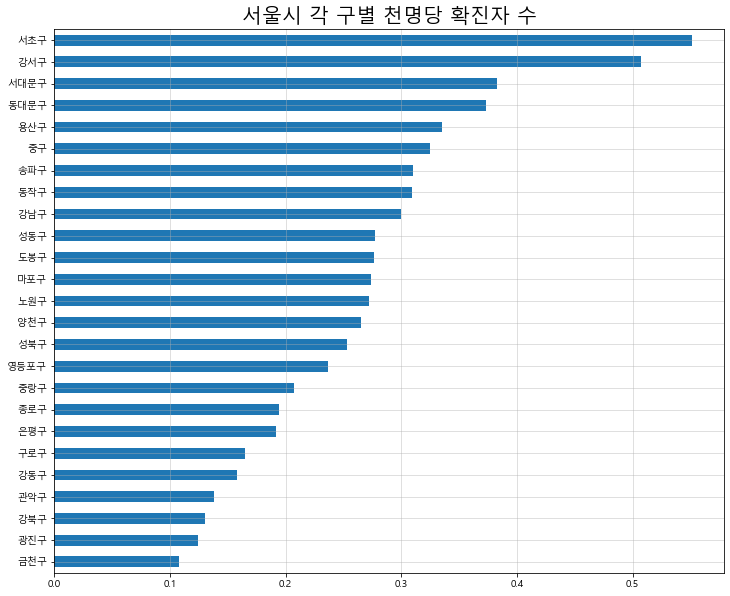

In [35]:
seoul['천명당 확진자 수'].sort_values().plot(kind='barh', rot=0, figsize=(12,10), legend=False)
plt.title("서울시 각 구별 천명당 확진자 수", fontsize=20)
plt.grid(True, alpha=0.5)
plt.show()

#### 천명당 확진자 수 지도

In [36]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data= seoul['천명당 확진자 수'],
               columns = [seoul.index],
               fill_color = 'YlOrRd',
               key_on = 'feature.id')
map